<a href="https://colab.research.google.com/github/kavishbhardwaj/Machine_Learning_Maths/blob/main/Week_1_Programming_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week-1

**Note to Learners**:

- Click on "Copy to Drive", the button that appears just below the taskbar, to make a copy of this notebook in your drive. If you continue working with this notebook, changes **will not** be saved.


- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [38]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)


##### DO NOT EDIT THIS CELL #####

## Problem-1

How many samples does the dataset have?

In [39]:
# Print the number of samples in the training and test sets
num_samples = X.shape[0]
print("Number of samples in the dataset:", num_samples)

Number of samples in the dataset: 100


## Problem-2

How many features does the dataset have?

In [40]:
num_features = X.shape[1]
print("Number of features in the dataset:", num_features)


Number of features in the dataset: 784


## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library.

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

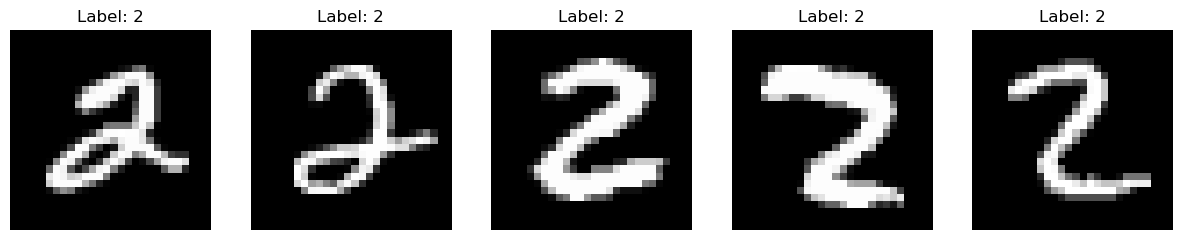

In [41]:
#This script will display the first five images labeled as '2' from your training dataset
# Display multiple images along with their labels
fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # Create a grid of 1x5 to display 5 images
for i, ax in enumerate(axes):
    ax.imshow(X_train[y_train == 2][i].reshape(28, 28), cmap='gray')  # Reshape and display each image
    ax.title.set_text('Label: 2')
    ax.axis('off')
plt.show()



## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [42]:
import numpy as np

# Assuming X is already defined as your dataset of 100 samples
# Each sample is a vector of 784 features

# Step 1: Center the dataset around its mean
X_prime = X - X.mean(axis=0)

# Step 2: Calculate the sum of squares of the elements in X'
sum_of_squares = np.sum(X_prime**2)

# Step 3: Normalize the result
n = X_prime.shape[0]  # number of samples
d = X_prime.shape[1]  # number of features
normalized_result = (1 / (n * d)) * np.sqrt(sum_of_squares)

# Print the result rounded to two decimal places
print("Normalized sum of squares:", round(normalized_result, 2))



Normalized sum of squares: 0.23


### What is a Covariance Matrix?
The covariance matrix \( C \) is a way to measure the covariance (or joint variability) between different dimensions (or features) across a set of data. For image data like the MNIST dataset, where each feature is a pixel intensity, the covariance matrix helps in understanding how pixel intensities vary together across the set of images.

### How is it Computed for the 100 Images?
Given your dataset \( X' \), which consists of 100 images of the digit '2', reshaped and centered around the mean:
- **Dimensions**: Each image has been reshaped into a vector of 784 features (each corresponding to a pixel). So, \( X' \) is a 100x784 matrix.
- **Covariance Computation**: The covariance matrix \( C \) is computed from \( X' \) where:
  - The matrix \( C \) will be 784x784.
  - Each entry \( C_{ij} \) in this matrix represents the covariance between the ith and jth features (pixels) across all 100 images.
  

### Python Implementation
If you have not computed \( C \) yet, here’s how you would compute the covariance matrix for your centered dataset \( X' \) using NumPy:

```python
import numpy as np

# Assuming X_prime is already defined as your centered dataset
# Compute the covariance matrix
C = np.cov(X_prime.T)  # Transpose X_prime to make variables as columns

# Now C is a 784x784 matrix where each element represents the covariance between two pixels across the 100 images
```

This process gives you a comprehensive view of how pixel values in the images of the digit '2' vary in relation to one another, which can be crucial for tasks such as feature reduction, image compression, or pattern recognition.

## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{d^2} \sqrt{\sum \limits_{i = 1}^{d} \sum \limits_{j = 1}^{d} C_{ij}^2}
$$

In [44]:
import numpy as np

# Assuming X_prime is already defined as your centered dataset of 100 samples
# Each sample is a vector of 784 features

# Step 1: Compute the covariance matrix of the centered dataset
#C = np.cov(X_prime, rowvar=False)  # Use rowvar=False to treat rows as variables
C = np.cov(X_prime.T)

# Step 2: Calculate the sum of the squares of the elements in the covariance matrix
sum_of_squares = np.sum(C**2)

# Step 3: Calculate the required quantity
d = X_prime.shape[1]  # number of features
result = (1 / (d**2)) * np.sqrt(sum_of_squares)

# Print the result rounded to two decimal places
print("Calculated quantity:", round(result, 2))

Calculated quantity: 1.38


## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [ ]:
'''import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X_prime is your data centered around the mean

# Step 1: Standardize the data
scaler = StandardScaler(with_mean=False, with_std=True)
X_std = scaler.fit_transform(X_prime)  # Standardize the data to have unit variance

# Step 2: Apply PCA for all components
pca_all = PCA()  # Computes all principal components
pca_all.fit(X_std)

# Step 2a: Apply PCA for just the first two components
pca_two = PCA(n_components=2)  # Limit to first two principal components
pca_two.fit(X_std)

# Step 3: Compute w = w1 + w2
w = pca_two.components_[0] + pca_two.components_[1]  # Sum of first and second principal components

# Calculate the modulus of w (which is the sum of the first two PCs)
modulus_w = np.linalg.norm(w)

# Step 4: Compute the sum of all principal components
w_all = np.sum(pca_all.components_, axis=0)  # Summing all components

# Step 5: Calculate the modulus of the sum of all principal components
modulus_w_all = np.linalg.norm(w_all)

# Print results rounded to two decimal places
print("Sum of the first two principal components (modulus):", round(modulus_w, 2))
print("Modulus of the sum of all principal components:", round(modulus_w_all, 2))'''


ModuleNotFoundError: No module named 'sklearn'

In [50]:
import numpy as np

# Assuming X_prime is your centered dataset

# Step 1: Standardize the data (optional scaling since mean is already zero)
# Uncomment the next line if you need to scale by standard deviation
# X_std = X_prime / np.std(X_prime, axis=0)

X_std = X_prime  # If data is already scaled appropriately, use as is

# Step 2: Compute the covariance matrix
C = np.cov(X_std, rowvar=False)

# Step 3: Compute eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(C)

# Sort the eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 4: Extract the first two principal components
w1 = sorted_eigenvectors[:, 0]
w2 = sorted_eigenvectors[:, 1]
w = w1 + w2
sum_of_components_w = np.sum(w)

# Calculate the modulus of w (sum of the first two PCs)
modulus_w = np.linalg.norm(w)

# Sum all principal components
w_all = np.sum(sorted_eigenvectors, axis=1)

# Calculate the modulus of the sum of all principal components
modulus_w_all = np.linalg.norm(w_all)



# Print results rounded to two decimal places
#print("Sum of the first two principal components:", w)
print("Sum of all components of the vector from the first two PCs:", round(sum_of_components_w, 2))
print("Sum of the first two principal components (modulus):", round(modulus_w, 2))
print("Modulus of the sum of all principal components:", round(modulus_w_all, 2))


Sum of all components of the vector from the first two PCs: 1.05
Sum of the first two principal components (modulus): 1.41
Modulus of the sum of all principal components: 28.0


## Problem-7

Visualize the first principal component as an image.

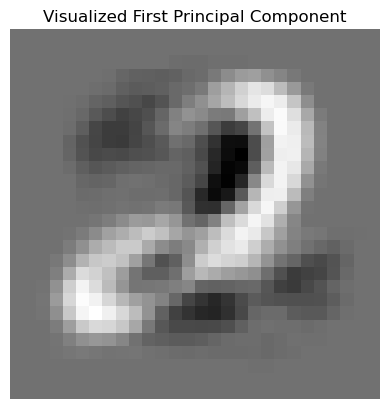

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_prime is your centered data

# Compute the covariance matrix
C = np.cov(X_prime, rowvar=False)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(C)

# Sort eigenvectors by descending eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Extract the first principal component
first_pc = sorted_eigenvectors[:, 0]

# Reshape this vector into a 28x28 matrix
first_pc_image = first_pc.reshape(28, 28)

# Plotting the first principal component as an image
plt.imshow(first_pc_image, cmap='gray')
plt.title('Visualized First Principal Component')
plt.axis('off')  # Hide the axis to focus on the image
plt.show()


## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [52]:
import numpy as np

# Assuming X_prime is your centered data

# Compute the covariance matrix
C = np.cov(X_prime, rowvar=False)

# Compute eigenvalues (and optionally eigenvectors)
eigenvalues, _ = np.linalg.eigh(C)

# Sort eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Calculate the total variance (sum of all eigenvalues)
total_variance = np.sum(sorted_eigenvalues)

# Determine the smallest number of principal components that explain at least 95% of the variance
cumulative_variance = np.cumsum(sorted_eigenvalues)
k = np.argmax(cumulative_variance >= 0.95 * total_variance) + 1  # +1 because indices start at 0

print("The smallest number of principal components to capture at least 95% of the variance is:", k)


The smallest number of principal components to capture at least 95% of the variance is: 53


## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



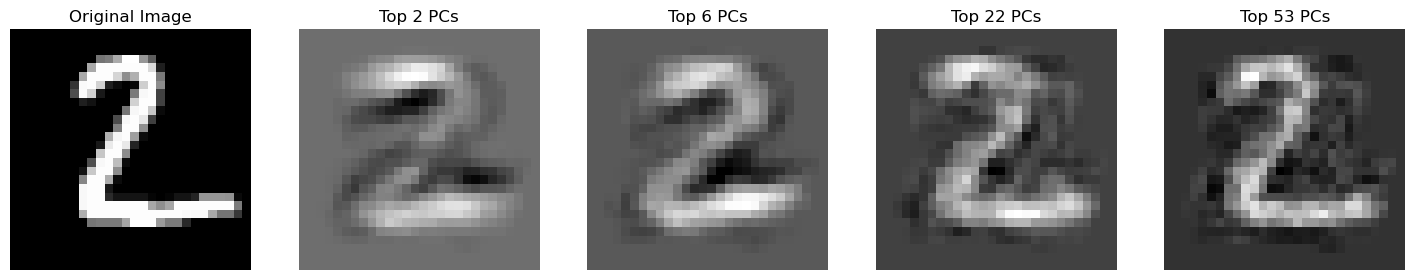

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_prime is your centered data and test_image is your selected test image

# Compute the covariance matrix
C = np.cov(X_prime, rowvar=False)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(C)

# Sort eigenvectors by descending eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
sorted_eigenvalues = eigenvalues[sorted_indices]

# Calculate total variance and cumulative variance
total_variance = np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(sorted_eigenvalues) / total_variance

# Thresholds for explained variance
thresholds = [0.20, 0.50, 0.80, 0.95]
k_values = [np.argmax(cumulative_variance >= t) + 1 for t in thresholds]

# Function to reconstruct image from top k components
def reconstruct_image(k, eigenvectors, mean_image, image):
    top_k_eigenvectors = eigenvectors[:, :k]
    image_projected = np.dot(image - mean_image, top_k_eigenvectors)
    reconstructed = np.dot(image_projected, top_k_eigenvectors.T) + mean_image
    return reconstructed.reshape(28, 28)

# Reconstruct the image for each k
reconstructed_images = [reconstruct_image(k, sorted_eigenvectors, X_prime.mean(axis=0), test_image) for k in k_values]

# Plot the original and each reconstructed image
fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(18, 4))  # Adjust subplot setup
axes[0].imshow(test_image.reshape(28, 28), cmap='gray')  # Show the original image
axes[0].set_title('Original Image')
axes[0].axis('off')

for ax, img, k in zip(axes[1:], reconstructed_images, k_values):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Top {k} PCs')
    ax.axis('off')

plt.show()

